![title banner](../banners/start_banner.png)

# Topic : Matplotlib Basics

This notebook provides sample code to visualize data using matplotlib.

**Further Reference:** https://matplotlib.org/3.3.4/tutorials/introductory/lifecycle.html#sphx-glr-tutorials-introductory-lifecycle-py

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../test_datasets/nba.csv')
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


### Basic Data Cleaning

In [3]:
# split by hyphen
hght = df['Height'].str.split("-", expand=True)
hght.columns = ['feet', 'inches']

# calculate height in inches
hght = hght.astype('float')
hght['hght_in'] = (hght['feet'] * 12) + hght['inches']

# add new feature
df['height_in'] = hght['hght_in'].copy()
df = df.drop(['Height'], axis=1)
df.head()

,Name,Team,Number,Position,Age,Weight,College,Salary,height_in
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,180.0,Texas,7730337.0,74.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,235.0,Marquette,6796117.0,78.0
2,John Holland,Boston Celtics,30.0,SG,27.0,205.0,Boston University,NaN,77.0
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,185.0,Georgia State,1148640.0,77.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,231.0,NaN,5000000.0,82.0


In [4]:
# remove observations without salary info

df = df.dropna(axis=0, subset=['Salary'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 446 entries, 0 to 456
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       446 non-null    object 
 1   Team       446 non-null    object 
 2   Number     446 non-null    float64
 3   Position   446 non-null    object 
 4   Age        446 non-null    float64
 5   Weight     446 non-null    float64
 6   College    364 non-null    object 
 7   Salary     446 non-null    float64
 8   height_in  446 non-null    float64
dtypes: float64(5), object(4)
memory usage: 34.8+ KB


In [5]:
# impute missing college info

df['College'] = df['College'].fillna('Missing')
df.head()

,Name,Team,Number,Position,Age,Weight,College,Salary,height_in
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,180.0,Texas,7730337.0,74.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,235.0,Marquette,6796117.0,78.0
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,185.0,Georgia State,1148640.0,77.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,231.0,Missing,5000000.0,82.0
5,Amir Johnson,Boston Celtics,90.0,PF,29.0,240.0,Missing,12000000.0,81.0


### Data Visualization

Here, we shall depict the object oriented way of making plots in matplotlib, this is a very neat way to do this.

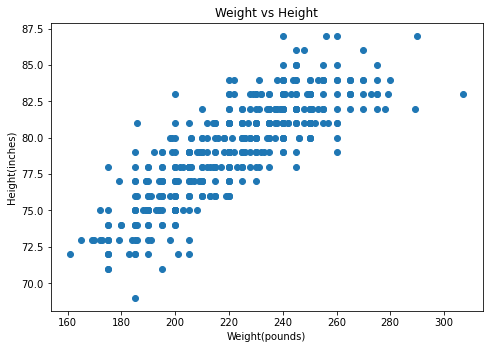

In [6]:
# create a figure object (a figure contains all elements of a plot)
fig = plt.figure()

# create the axes
ax = fig.add_axes([0,0,1,1])

# compare weight and height with a scatter plot
ax.scatter(x=df['Weight'], y=df['height_in'])

# add some detail to the plot
ax.set_title('Weight vs Height')
ax.set_ylabel('Height(inches)')
ax.set_xlabel('Weight(pounds)')

# display plot
plt.show()

You can use the above code cell as a template to follow while making your plots. Basically, follow these steps to ensure your plots are well-created.

1. Transform data to convert it to a form required for visualization
2. Create the figure object and axes
3. Choose the best kind of plot for your visualization and plot it
4. Add some useful detail to the plot
5. Play around with aesthetics of the plot (eg. maybe you want to change the background or add a legend)


In [7]:
df.head()

,Name,Team,Number,Position,Age,Weight,College,Salary,height_in
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,180.0,Texas,7730337.0,74.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,235.0,Marquette,6796117.0,78.0
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,185.0,Georgia State,1148640.0,77.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,231.0,Missing,5000000.0,82.0
5,Amir Johnson,Boston Celtics,90.0,PF,29.0,240.0,Missing,12000000.0,81.0


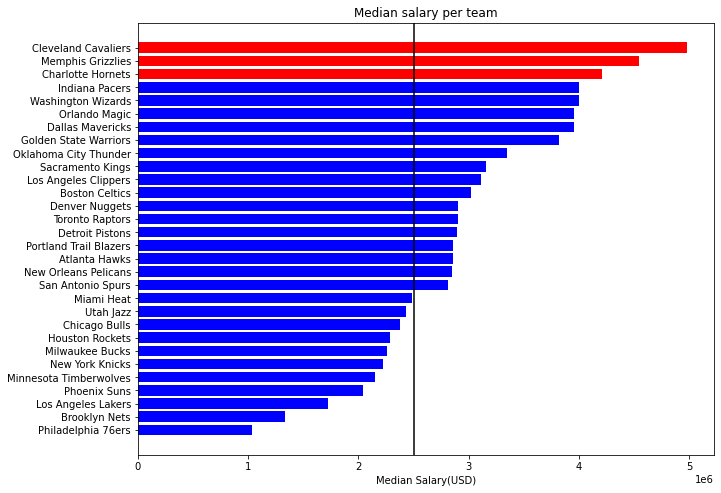

In [8]:
# which teams spend the most per player? (median)

# prep data
team_med_sal = df.groupby(['Team'], as_index=False).\
    agg({'Salary':'median'}).\
    sort_values(by='Salary')

# visualize
fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([0,0,1,1])
colors = (['blue'] * (team_med_sal.shape[0]-3)) + (['red'] * 3)
ax.barh(y=team_med_sal['Team'], width=team_med_sal['Salary'], color=colors)
ax.axvline(x=2500000, ymin=0, ymax=1, color='black')
ax.set_title('Median salary per team')
ax.set_xlabel('Median Salary(USD)')
plt.show()

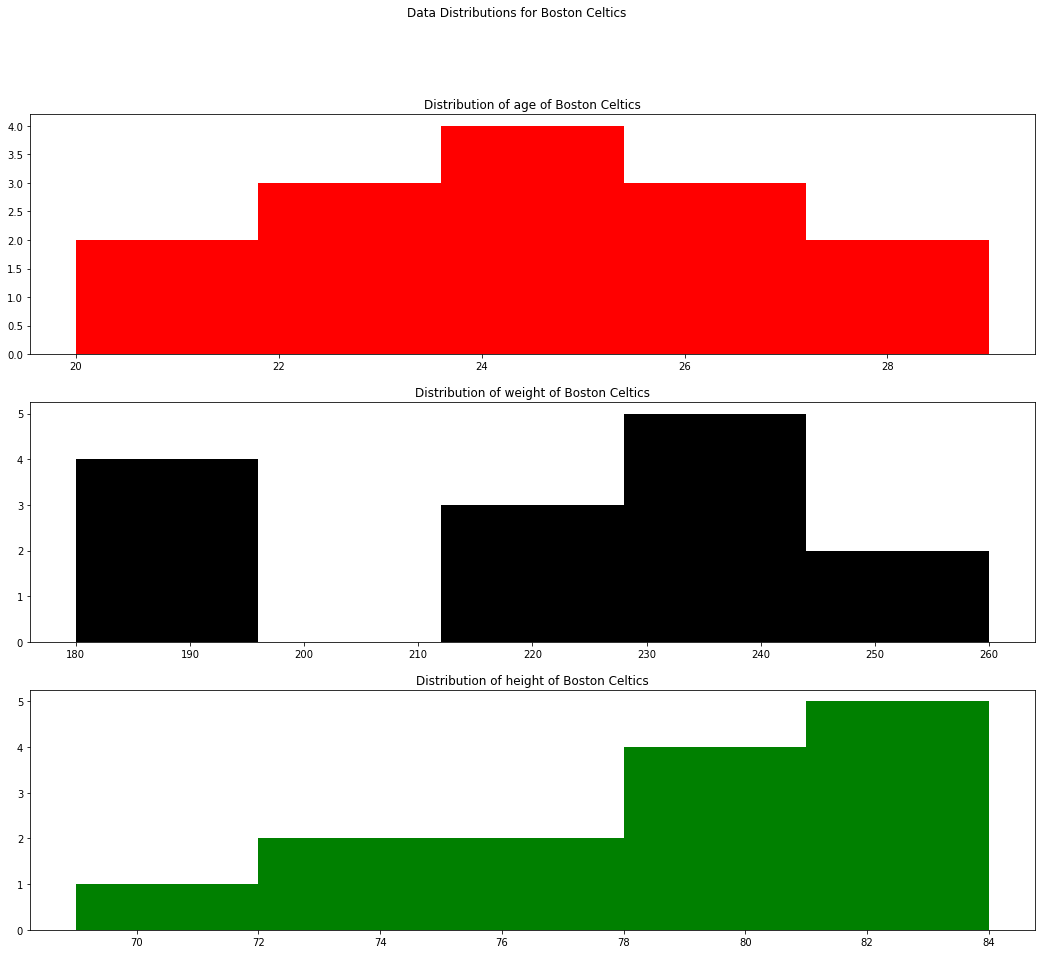

In [9]:
# subplots

# prep data
bc = df[df['Team'] == 'Boston Celtics']

# set figure and axes
fig, axs = plt.subplots(3, 1, figsize=(18,15))
# super title
plt.suptitle('Data Distributions for Boston Celtics')
# subplots
axs[0].hist(bc['Age'], color='red', bins=5)
axs[0].set_title('Distribution of age of Boston Celtics')
axs[1].hist(bc['Weight'], color='black', bins=5)
axs[1].set_title('Distribution of weight of Boston Celtics')
axs[2].hist(bc['height_in'], color='green', bins=5)
axs[2].set_title('Distribution of height of Boston Celtics')
plt.show()

Subplots are very useful features to visualize data and depict different patterns together, as shown above. You can read more about advanced subplotting techniques [here](https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html).

![end banner](../banners/finish_banner.png)